In [109]:
library(gplots)
library(data.table)
library(tidyverse)
library(RColorBrewer)
library(ggplot2)
library(dplyr)

In [261]:
# make a df combining blacklist and no blacklist

bl = fread("/data/pinello/PROJECTS/2019_03_scATAC/Github/scATAC-benchmarking/Real_Data/Buenrostro_2018/output/metrics/clustering_scores.csv")
no_bl = fread("/data/pinello/PROJECTS/2019_03_scATAC/Github_supp/Buenrostro_2018/test_blacklist/output/metrics/clustering_scores.csv")
# as.data.frame(c(bl[4:5,], bl[6,]))
bl = bl[4:5,]
# head(bl)
# write.csv(bl, file = "blacklist.csv", row.names=TRUE)

row1 = no_bl[1,]
row3 = no_bl[3,]
comb = bind_rows(bl,row1, row3)
head(comb)
# write.csv(nobl, file = "no_blacklist.csv", row.names=TRUE)

write.csv(comb, file = "comb_bl_nobl.csv", row.names=TRUE)

V1,ARI_Louvain,ARI_kmeans,ARI_HC,AMI_Louvain,AMI_kmeans,AMI_HC,Homogeneity_Louvain,Homogeneity_kmeans,Homogeneity_HC
SnapATAC,0.42034078,0.35329865,0.44305614,0.68449885,0.60501744,0.68908066,0.65281466,0.58964496,0.64597427
SCRAT_motifs,0.05158738,0.04059899,0.03804919,0.14000829,0.10185238,0.10456051,0.15407489,0.11502550,0.11699891
SnapATAC_no_blacklist,0.44152593,0.41273798,0.34699914,0.65623412,0.64621650,0.63376540,0.65460171,0.60922823,0.57744746
SCRAT_no_blacklist,0.01003097,0.02221118,0.03032221,0.05231552,0.04260793,0.04977554,0.06289825,0.05333733,0.05998703


In [262]:
path = "comb_bl_nobl.csv"

In [263]:
scores <- read.delim(path, sep=",", header = TRUE) %>% rowwise %>% mutate("Sort" = max(ARI_Louvain,ARI_kmeans,ARI_HC)) %>% as.data.frame()

In [266]:
scores

X,V1,ARI_Louvain,ARI_kmeans,ARI_HC,AMI_Louvain,AMI_kmeans,AMI_HC,Homogeneity_Louvain,Homogeneity_kmeans,Homogeneity_HC,Sort
1,SnapATAC,0.42034078,0.35329865,0.44305614,0.68449885,0.60501744,0.68908066,0.65281466,0.58964496,0.64597427,0.44305614
2,SCRAT_motifs,0.05158738,0.04059899,0.03804919,0.14000829,0.10185238,0.10456051,0.15407489,0.11502550,0.11699891,0.05158738
3,SnapATAC_no_blacklist,0.44152593,0.41273798,0.34699914,0.65623412,0.64621650,0.63376540,0.65460171,0.60922823,0.57744746,0.44152593
4,SCRAT_no_blacklist,0.01003097,0.02221118,0.03032221,0.05231552,0.04260793,0.04977554,0.06289825,0.05333733,0.05998703,0.03032221


In [286]:
df <- scores %>% select(-X,-Sort) %>% gather() 

# select() gets rid of columns 'X' and 'Sort'
# gather() collapses columns of the df down to a [key, value] pair

df
dim(df)

Warning message:
“attributes are not identical across measure variables;
they will be dropped”

key,value
V1,SnapATAC
V1,SCRAT_motifs
V1,SnapATAC_no_blacklist
V1,SCRAT_no_blacklist
ARI_Louvain,0.420340775805741
ARI_Louvain,0.0515873787492768
ARI_Louvain,0.441525934
ARI_Louvain,0.010030968
ARI_kmeans,0.353298650482534
ARI_kmeans,0.0405989880169619


[1] 40  2

In [308]:
x = df[1:4,2]
x

[1] "SnapATAC"              "SCRAT_motifs"          "SnapATAC_no_blacklist"
[4] "SCRAT_no_blacklist"

In [315]:
df2 = data.frame

for (i in x){
    df %>% mutate("Method" = rep(scores$X, 10), 
              "Clustering" = sapply(strsplit(key,"\\_"),'[',i=2), 
              "Metric" = sapply(strsplit(key,"\\_"),'[',i=1), 
              "exp" = paste(Clustering,Metric,sep="_"))
            dfx = cbind(df2,df)
    #print(paste0("col",df))
    }



ERROR: Error in data.frame(..., check.names = FALSE): arguments imply differing number of rows: 0, 40


In [297]:
df$Metric <- factor(df$Metric, levels = c("ARI", "AMI", "Homogeneity"))
df$Method <- factor(df$Method, levels=rev(scores$X[order(scores$Sort, decreasing = T)]))

ERROR: Error in `$<-.data.frame`(`*tmp*`, Metric, value = structure(integer(0), .Label = c("ARI", : replacement has 0 rows, data has 40


In [214]:
for (i in paths){
  scores <- read.delim(i, sep=",") %>% 
    rowwise %>% mutate("Sort" = max(ARI_Louvain,ARI_kmeans,ARI_HC)) %>% as.data.frame()
  
  df <- scores %>% select(-X,-Sort) %>% gather() %>% mutate("Method" = rep(scores$X, 9), 
                                                            "Clustering" = sapply(strsplit(key,"\\_"),'[',i=2),
                                                            "Metric" = sapply(strsplit(key,"\\_"),'[',i=1),
                                                            "exp" = paste(Clustering,Metric,sep="_"))
  
  df$Metric <- factor(df$Metric, levels = c("ARI", "AMI", "Homogeneity"))
  df$Method <- factor(df$Method, levels=rev(scores$X[order(scores$Sort, decreasing = T)]))
  dev.off()
}



Warning message:
“attributes are not identical across measure variables;
they will be dropped”

ERROR: Error: Column `Method` must be length 20 (the number of rows) or one, not 18


In [213]:
  pdf("dotPlot.pdf", width = 14, height = 8)
  ggplot(df, aes(x=value, y= Method, colour=Clustering, shape=Clustering)) + 
    geom_point(size = 5) + 
    facet_grid(cols = vars(Metric)) +
    scale_x_continuous(limits = c(-0.01,1))+ 
    guides(color= guide_legend(), size=guide_legend()) + 
    scale_color_manual(values=c("#1f78b4","#33a02c","#ff7f00")) +
    ggtitle("") +
    theme_bw(base_size = 14) + xlab("") + ylab("") + 
    theme(panel.grid.minor.x = element_blank(),
          panel.grid.minor.y = element_blank(),
          axis.text.x = element_text(size=14, colour = "black"),
          axis.text.y = element_text(size=14, colour = "black"),
          legend.position = "right",
          strip.text.x = element_text(size = 16, colour = "black", angle = 0)
    )

ERROR while rich displaying an object: Error: At least one layer must contain all faceting variables: `Metric`.
* Plot is missing `Metric`
* Layer 1 is missing `Metric`

Traceback:
1. FUN(X[[i]], ...)
2. tryCatch(withCallingHandlers({
 .     if (!mime %in% names(repr::mime2repr)) 
 .         stop("No repr_* for mimetype ", mime, " in repr::mime2repr")
 .     rpr <- repr::mime2repr[[mime]](obj)
 .     if (is.null(rpr)) 
 .         return(NULL)
 .     prepare_content(is.raw(rpr), rpr)
 . }, error = error_handler), error = outer_handler)
3. tryCatchList(expr, classes, parentenv, handlers)
4. tryCatchOne(expr, names, parentenv, handlers[[1L]])
5. doTryCatch(return(expr), name, parentenv, handler)
6. withCallingHandlers({
 .     if (!mime %in% names(repr::mime2repr)) 
 .         stop("No repr_* for mimetype ", mime, " in repr::mime2repr")
 .     rpr <- repr::mime2repr[[mime]](obj)
 .     if (is.null(rpr)) 
 .         return(NULL)
 .     prepare_content(is.raw(rpr), rpr)
 . }, error = error_

In [197]:
scores <- read.delim(comp_path, sep=",") %>% rowwise %>% mutate("Sort" = max(ARI_Louvain,ARI_kmeans,ARI_HC)) %>% as.data.frame()

In [198]:
head(scores)

X,V1,ARI_Louvain,ARI_kmeans,ARI_HC,AMI_Louvain,AMI_kmeans,AMI_HC,Homogeneity_Louvain,Homogeneity_kmeans,Homogeneity_HC,Sort
1,SnapATAC,0.42034078,0.35329865,0.44305614,0.68449885,0.60501744,0.68908066,0.65281466,0.58964496,0.64597427,0.44305614
2,SCRAT_motifs,0.05158738,0.04059899,0.03804919,0.14000829,0.10185238,0.10456051,0.15407489,0.11502550,0.11699891,0.05158738
3,SnapATAC_no_blacklist,0.44152593,0.41273798,0.34699914,0.65623412,0.64621650,0.63376540,0.65460171,0.60922823,0.57744746,0.44152593
4,SCRAT_no_blacklist,0.01003097,0.02221118,0.03032221,0.05231552,0.04260793,0.04977554,0.06289825,0.05333733,0.05998703,0.03032221


In [200]:
df <- scores %>% select(-X,-Sort) %>% gather()

Warning message:
“attributes are not identical across measure variables;
they will be dropped”

In [175]:
df$Metric <- factor(df$Metric, levels = c("ARI", "AMI", "Homogeneity"))
df$Method <- factor(df$Method, levels=rev(scores$X[order(scores$Sort, decreasing = T)]))

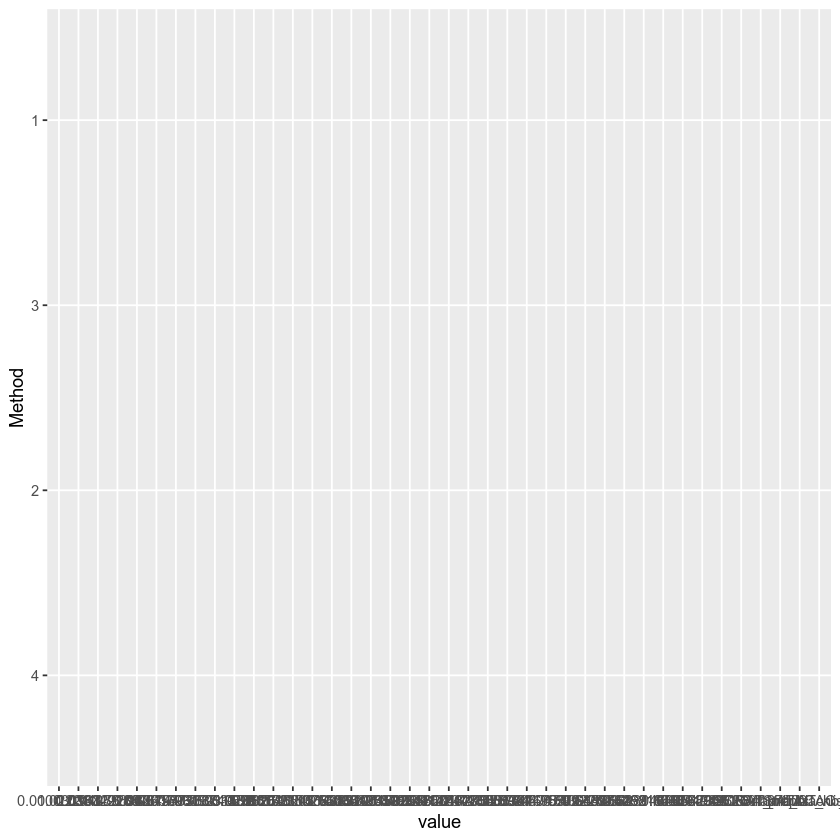

In [176]:
ggplot(df, aes(x=value, y= Method, colour=Clustering, shape=Clustering))

In [164]:
scores <- read.delim((comp_path), sep=",") %>% 
        rowwise %>% mutate("Sort" = max(ARI_Louvain,ARI_kmeans,ARI_HC)) %>% as.data.frame()
  
        df <- scores %>% select(-X,-Sort) %>% gather() %>% mutate("Method" = rep(scores$X, 9), 
                                                            "Clustering" = sapply(strsplit(key,"\\_"),'[',i=2),
                                                            "Metric" = sapply(strsplit(key,"\\_"),'[',i=1),
                                                            "exp" = paste(Clustering,Metric,sep="_"))
    
        df$Metric <- factor(df$Metric, levels = c("ARI", "AMI", "Homogeneity"))
        df$Method <- factor(df$Method, levels=rev(scores$X[order(scores$Sort, decreasing = T)]))

Warning message:
“attributes are not identical across measure variables;
they will be dropped”

ERROR: Error: Column `Method` must be length 40 (the number of rows) or one, not 36


In [157]:
df

key,value,Method,Clustering,Metric,exp
ARI_Louvain,0.44152593,NA,Louvain,ARI,Louvain_ARI
ARI_Louvain,0.18242234,NA,Louvain,ARI,Louvain_ARI
ARI_Louvain,0.01003097,NA,Louvain,ARI,Louvain_ARI
ARI_kmeans,0.41273798,NA,kmeans,ARI,kmeans_ARI
ARI_kmeans,0.01375860,NA,kmeans,ARI,kmeans_ARI
ARI_kmeans,0.02221118,NA,kmeans,ARI,kmeans_ARI
ARI_HC,0.34699914,NA,HC,ARI,HC_ARI
ARI_HC,0.03441665,NA,HC,ARI,HC_ARI
ARI_HC,0.03032221,NA,HC,ARI,HC_ARI
AMI_Louvain,0.65623412,NA,Louvain,AMI,Louvain_AMI


In [143]:
scores <- read.delim(comp_path, sep = ",") %>% rowwise %>% mutate("Sort" = max(ARI_Louvain,ARI_kmeans,ARI_HC)) %>% as.data.frame()

In [145]:
scores

X,V1,ARI_Louvain,ARI_kmeans,ARI_HC,AMI_Louvain,AMI_kmeans,AMI_HC,Homogeneity_Louvain,Homogeneity_kmeans,Homogeneity_HC,Sort
1,SnapATAC,0.42034078,0.35329865,0.44305614,0.68449885,0.60501744,0.68908066,0.65281466,0.58964496,0.64597427,0.44305614
2,SCRAT_motifs,0.05158738,0.04059899,0.03804919,0.14000829,0.10185238,0.10456051,0.15407489,0.11502550,0.11699891,0.05158738
3,SnapATAC_no_blacklist,0.44152593,0.41273798,0.34699914,0.65623412,0.64621650,0.63376540,0.65460171,0.60922823,0.57744746,0.44152593
4,SCRAT_no_blacklist,0.01003097,0.02221118,0.03032221,0.05231552,0.04260793,0.04977554,0.06289825,0.05333733,0.05998703,0.03032221


In [ ]:
df <- scores

In [146]:
df <- scores %>% select(-X,-Sort) %>% gather() %>% mutate("Method" = rep(scores$X, 9), 
                                                            "Clustering" = sapply(strsplit(key,"\\_"),'[',i=2),
                                                            "Metric" = sapply(strsplit(key,"\\_"),'[',i=1),
                                                            "exp" = paste(Clustering,Metric,sep="_"))

ERROR: Error in parse(text = x, srcfile = src): <text>:2:111: unexpected ','
1: df <- scores %>% select(-X,-Sort) # %>% gather() %>% mutate("Method" = rep(scores$X, 9), 
2:                                                             "Clustering" = sapply(strsplit(key,"\\_"),'[',i=2),
                                                                                                                 ^


In [142]:
scores <- read.delim(comp_path, sep = ",") %>% rowwise %>% mutate("Sort" = max(ARI_Louvain,ARI_kmeans,ARI_HC)) %>% as.data.frame()

df <- scores %>% select(-X,-Sort) %>% gather() %>% mutate("Method" = rep(scores$X, 9), 
                                                            "Clustering" = sapply(strsplit(key,"\\_"),'[',i=2),
                                                            "Metric" = sapply(strsplit(key,"\\_"),'[',i=1),
                                                            "exp" = paste(Clustering,Metric,sep="_"))

  df$Metric <- factor(df$Metric, levels = c("ARI", "AMI", "Homogeneity"))
  df$Method <- factor(df$Method, levels=rev(scores$X[order(scores$Sort, decreasing = T)]))

Warning message:
“attributes are not identical across measure variables;
they will be dropped”

ERROR: Error: Column `Method` must be length 40 (the number of rows) or one, not 36


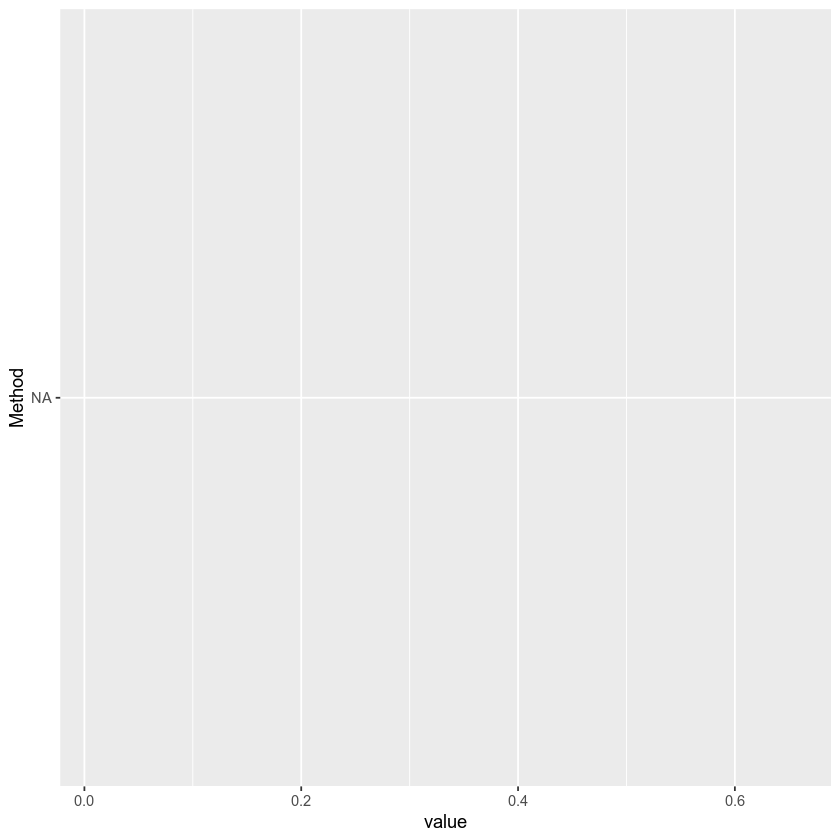

In [156]:
ggplot(df, aes(x=value, y= Method, colour=Clustering, shape=Clustering))

In [82]:
#paths <- c("/data/pinello/PROJECTS/2019_03_scATAC/Github_supp/Buenrostro_2018/test_blacklist/output/metrics/clustering_scores.csv")
          #"/data/pinello/PROJECTS/2019_03_scATAC/Github/scATAC-benchmarking/Real_Data/Buenrostro_2018/output/metrics/clustering_scores.csv")

In [127]:
# for (i in comp_path){
    scores <- read.delim((com_path), sep=",") %>% rowwise %>% mutate("Sort" = max(ARI_Louvain,ARI_kmeans,ARI_HC)) %>% as.data.frame()
    
      df <- scores %>% select(-X,-Sort) %>% gather() %>% mutate("Method" = rep(scores$X, 9), 
                                                            "Clustering" = sapply(strsplit(key,"\\_"),'[',i=2),
                                                            "Metric" = sapply(strsplit(key,"\\_"),'[',i=1),
                                                            "exp" = paste(Clustering,Metric,sep="_"))
  
  df$Metric <- factor(df$Metric, levels = c("ARI", "AMI", "Homogeneity"))
  df$Method <- factor(df$Method, levels=rev(scores$X[order(scores$Sort, decreasing = T)]))

  pdf("dotPlot.pdf", width = 14, height = 8)
  ggplot(df, aes(x=value, y= Method, colour=Clustering, shape=Clustering)) + 
    geom_point(size = 5) + 
    facet_grid(cols = vars(Metric)) +
    scale_x_continuous(limits = c(-0.01,1))+ 
    guides(color= guide_legend(), size=guide_legend()) + 
    scale_color_manual(values=c("#1f78b4","#33a02c","#ff7f00")) +
    ggtitle("") +
    theme_bw(base_size = 14) + xlab("") + ylab("") + 
    theme(panel.grid.minor.x = element_blank(),
          panel.grid.minor.y = element_blank(),
          axis.text.x = element_text(size=14, colour = "black"),
          axis.text.y = element_text(size=14, colour = "black"),
          legend.position = "right",
          strip.text.x = element_text(size = 16, colour = "black", angle = 0)
    )
  dev.off()
}

Warning message:
“attributes are not identical across measure variables;
they will be dropped”

ERROR: Error: Column `Method` must be length 40 (the number of rows) or one, not 36


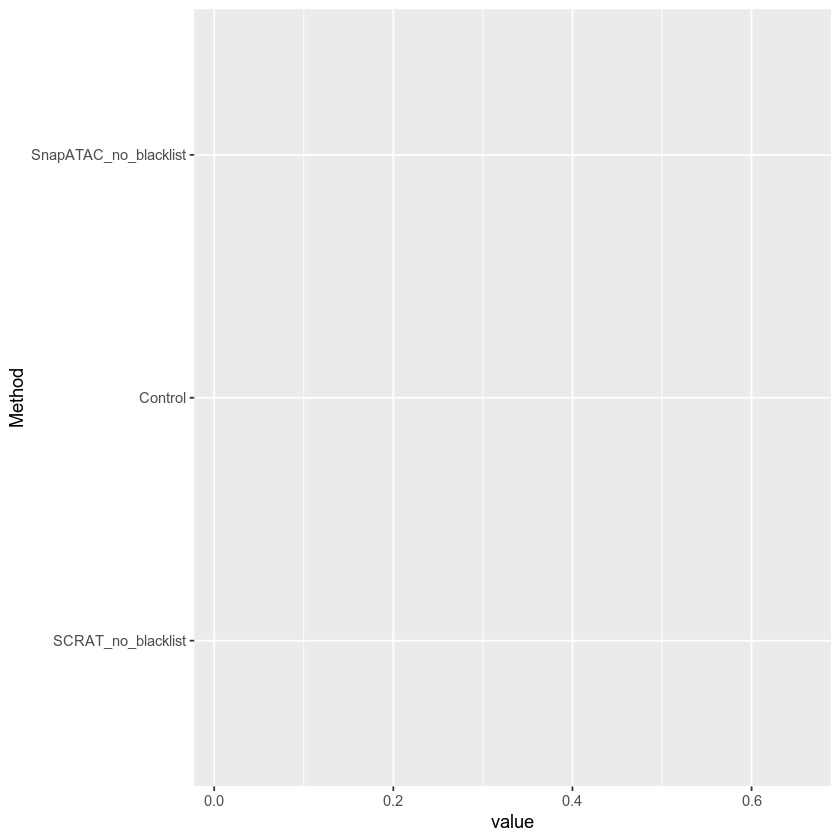

In [88]:
# pdf("dotPlot_test.pdf", width = 14, height = 8)
ggplot(df, aes(x=value, y= Method, colour=Clustering, shape=Clustering))

In [83]:
for (i in paths){
    scores <- read.delim((i), sep=",") %>% rowwise %>% mutate("Sort" = max(ARI_Louvain,ARI_kmeans,ARI_HC)) %>% as.data.frame()
    
      df <- scores %>% select(-X,-Sort) %>% gather() %>% mutate("Method" = rep(scores$X, 9), 
                                                            "Clustering" = sapply(strsplit(key,"\\_"),'[',i=2),
                                                            "Metric" = sapply(strsplit(key,"\\_"),'[',i=1),
                                                            "exp" = paste(Clustering,Metric,sep="_"))
    
    }

Warning message in read.table(file = file, header = header, sep = sep, quote = quote, :
“incomplete final line found by readTableHeader on '/data/pinello/PROJECTS/2019_03_scATAC/Github_supp/Buenrostro_2018/test_blacklist/output/metrics/clustering_scores.csv'”

In [84]:
df

key,value,Method,Clustering,Metric,exp
ARI_Louvain,0.44152593,SnapATAC_no_blacklist,Louvain,ARI,Louvain_ARI
ARI_Louvain,0.18242234,Control,Louvain,ARI,Louvain_ARI
ARI_Louvain,0.01003097,SCRAT_no_blacklist,Louvain,ARI,Louvain_ARI
ARI_kmeans,0.41273798,SnapATAC_no_blacklist,kmeans,ARI,kmeans_ARI
ARI_kmeans,0.01375860,Control,kmeans,ARI,kmeans_ARI
ARI_kmeans,0.02221118,SCRAT_no_blacklist,kmeans,ARI,kmeans_ARI
ARI_HC,0.34699914,SnapATAC_no_blacklist,HC,ARI,HC_ARI
ARI_HC,0.03441665,Control,HC,ARI,HC_ARI
ARI_HC,0.03032221,SCRAT_no_blacklist,HC,ARI,HC_ARI
AMI_Louvain,0.65623412,SnapATAC_no_blacklist,Louvain,AMI,Louvain_AMI


In [59]:
for (i in paths){
    scores <- read.delim((i), sep=",") %>% rowwise %>% mutate("Sort" = max(ARI_Louvain,ARI_kmeans,ARI_HC)) %>% as.data.frame()
    
    df <- scores %>% select(-X,-Sort) %>% gather() %>% mutate("Method" = rep(scores$X, 9), 
                                                            "Clustering" = sapply(strsplit(key,"\\_"),'[',i=2),
                                                            "Metric" = sapply(strsplit(key,"\\_"),'[',i=1),
                                                            "exp" = paste(Clustering,Metric,sep="_"))
    
    df$Metric <- factor(df$Metric, levels = c("ARI", "AMI", "Homogeneity"))
    df$Method <- factor(df$Method, levels=rev(scores$X[order(scores$Sort, decreasing = T)]))

    pdf(paste0("dotplot_noBL.pdf"), width = 14, height = 8)
    ggplot(df, aes(x=value, y= Method, colour=Clustering, shape=Clustering)) + 
    geom_point(size = 5) + 
    facet_grid(cols = vars(Metric)) +
    scale_x_continuous(limits = c(-0.01,1))+ 
    guides(color= guide_legend(), size=guide_legend()) + 
    scale_color_manual(values=c("#1f78b4","#33a02c","#ff7f00")) +
    ggtitle("") +
    theme_bw(base_size = 14) + xlab("") + ylab("") + 
    theme(panel.grid.minor.x = element_blank(),
          panel.grid.minor.y = element_blank(),
          axis.text.x = element_text(size=14, colour = "black"),
          axis.text.y = element_text(size=14, colour = "black"),
          legend.position = "right",
          strip.text.x = element_text(size = 16, colour = "black", angle = 0)
    )
  dev.off()
}

ERROR: Error in parse(text = x, srcfile = src): <text>:13:5: unexpected symbol
12:     pdf(paste0("dotPlot_", sapply(strsplit(paths[i],"/"), ".pdf"), width = 14, height = 8)
13:     ggplot
        ^


In [52]:
pdf(paste0("dotPlot_", sapply(strsplit(paths[i],"/"),'[',i=2), ".pdf"), width = 7, height = 8)
  ggplot(df, aes(x=Difference, y= Method, colour=Clustering, shape=Clustering)) + 
    geom_point(size = 5) + 
    scale_x_continuous(limits = c(-0.1,0.2))+ 
    guides(color= guide_legend(), size=guide_legend()) + 
    scale_color_manual(values=c("#1f78b4","#33a02c","#ff7f00")) +
    ggtitle("") +
    theme_bw(base_size = 14) + xlab("") + ylab("") + 
    theme(panel.grid.minor.x = element_blank(),
          panel.grid.minor.y = element_blank(),
          axis.text.x = element_text(size=14, colour = "black"),
          axis.text.y = element_text(size=14, colour = "black"),
          legend.position = "right",
          strip.text.x = element_text(size = 16, colour = "black", angle = 0)
    ) + facet_grid(. ~ title) 
dev.off()

ERROR while rich displaying an object: Error: At least one layer must contain all faceting variables: `title`.
* Plot is missing `title`
* Layer 1 is missing `title`

Traceback:
1. FUN(X[[i]], ...)
2. tryCatch(withCallingHandlers({
 .     if (!mime %in% names(repr::mime2repr)) 
 .         stop("No repr_* for mimetype ", mime, " in repr::mime2repr")
 .     rpr <- repr::mime2repr[[mime]](obj)
 .     if (is.null(rpr)) 
 .         return(NULL)
 .     prepare_content(is.raw(rpr), rpr)
 . }, error = error_handler), error = outer_handler)
3. tryCatchList(expr, classes, parentenv, handlers)
4. tryCatchOne(expr, names, parentenv, handlers[[1L]])
5. doTryCatch(return(expr), name, parentenv, handler)
6. withCallingHandlers({
 .     if (!mime %in% names(repr::mime2repr)) 
 .         stop("No repr_* for mimetype ", mime, " in repr::mime2repr")
 .     rpr <- repr::mime2repr[[mime]](obj)
 .     if (is.null(rpr)) 
 .         return(NULL)
 .     prepare_content(is.raw(rpr), rpr)
 . }, error = error_han

png 
  2

In [51]:
i=1
scores <- read.delim(paste0("/data/pinello/PROJECTS/2019_03_scATAC/Github/scATAC-benchmarking/", paths[i], "/output/metrics/clustering_RAGI_scores.csv"), sep=",") 

maxs <- scores %>% group_by(Method) %>% summarise(max=max(Difference)) %>% arrange(.,desc(max))
  
df <- scores %>% select(Method,Clustering,Difference)
df$Method <- factor(df$Method, levels=rev(maxs$Method))
df$title <- "Difference in Gini Score"
  
pdf(paste0("dotPlot_", sapply(strsplit(paths[i],"/"),'[',i=2), ".pdf"), width = 7, height = 8)
  ggplot(df, aes(x=Difference, y= Method, colour=Clustering, shape=Clustering)) + 
    geom_point(size = 5) + 
    scale_x_continuous(limits = c(-0.1,0.2))+ 
    guides(color= guide_legend(), size=guide_legend()) + 
    scale_color_manual(values=c("#1f78b4","#33a02c","#ff7f00")) +
    ggtitle("") +
    theme_bw(base_size = 14) + xlab("") + ylab("") + 
    theme(panel.grid.minor.x = element_blank(),
          panel.grid.minor.y = element_blank(),
          axis.text.x = element_text(size=14, colour = "black"),
          axis.text.y = element_text(size=14, colour = "black"),
          legend.position = "right",
          strip.text.x = element_text(size = 16, colour = "black", angle = 0)
    ) + facet_grid(. ~ title) 
dev.off()

Warning message in file(file, "rt"):
“cannot open file '/data/pinello/PROJECTS/2019_03_scATAC/Github/scATAC-benchmarking//data/pinello/PROJECTS/2019_03_scATAC/Github_supp/Buenrostro_2018/test_blacklist/output/metrics/clustering_scores.csv/output/metrics/clustering_RAGI_scores.csv': No such file or directory”

ERROR: Error in file(file, "rt"): cannot open the connection


In [45]:
scores

X,ARI_Louvain,ARI_kmeans,ARI_HC,AMI_Louvain,AMI_kmeans,AMI_HC,Homogeneity_Louvain,Homogeneity_kmeans,Homogeneity_HC,Sort
SnapATAC_no_blacklist,0.44152593,0.41273798,0.34699914,0.65623412,0.64621650,0.63376540,0.65460171,0.60922823,0.57744746,0.4415259
Control,0.18242234,0.01375860,0.03441665,0.37246305,0.02406304,0.04499966,0.38414523,0.02422913,0.04441404,0.1824223
SCRAT__no_blacklist,0.01003097,0.02221118,0.03032220,0.05231552,0.04260793,0.04977554,0.06289825,0.05333733,0.05998703,0.0303222


In [46]:
df <- scores %>% select(-X,-Sort) %>% gather() %>% mutate("Method" = rep(scores$X, 9), 
                                                            "Clustering" = sapply(strsplit(key,"\\_"),'[',i=2),
                                                            "Metric" = sapply(strsplit(key,"\\_"),'[',i=1),
                                                            "exp" = paste(Clustering,Metric,sep="_"))

In [47]:
df

key,value,Method,Clustering,Metric,exp
ARI_Louvain,0.44152593,SnapATAC_no_blacklist,Louvain,ARI,Louvain_ARI
ARI_Louvain,0.18242234,Control,Louvain,ARI,Louvain_ARI
ARI_Louvain,0.01003097,SCRAT__no_blacklist,Louvain,ARI,Louvain_ARI
ARI_kmeans,0.41273798,SnapATAC_no_blacklist,kmeans,ARI,kmeans_ARI
ARI_kmeans,0.01375860,Control,kmeans,ARI,kmeans_ARI
ARI_kmeans,0.02221118,SCRAT__no_blacklist,kmeans,ARI,kmeans_ARI
ARI_HC,0.34699914,SnapATAC_no_blacklist,HC,ARI,HC_ARI
ARI_HC,0.03441665,Control,HC,ARI,HC_ARI
ARI_HC,0.03032220,SCRAT__no_blacklist,HC,ARI,HC_ARI
AMI_Louvain,0.65623412,SnapATAC_no_blacklist,Louvain,AMI,Louvain_AMI


In [48]:
  df$Metric <- factor(df$Metric, levels = c("ARI", "AMI", "Homogeneity"))
  df$Method <- factor(df$Method, levels=rev(scores$X[order(scores$Sort, decreasing = T)]))

In [4]:





  df$Metric <- factor(df$Metric, levels = c("ARI", "AMI", "Homogeneity"))
  df$Method <- factor(df$Method, levels=rev(scores$X[order(scores$Sort, decreasing = T)]))

  pdf(paste0("dotPlot_", sapply(strsplit(paths[i],"/"),'[',i=2), ".pdf"), width = 14, height = 8)
  ggplot(df, aes(x=value, y= Method, colour=Clustering, shape=Clustering)) + 
    geom_point(size = 5) + 
    facet_grid(cols = vars(Metric)) +
    scale_x_continuous(limits = c(-0.01,1))+ 
    guides(color= guide_legend(), size=guide_legend()) + 
    scale_color_manual(values=c("#1f78b4","#33a02c","#ff7f00")) +
    ggtitle("") +
    theme_bw(base_size = 14) + xlab("") + ylab("") + 
    theme(panel.grid.minor.x = element_blank(),
          panel.grid.minor.y = element_blank(),
          axis.text.x = element_text(size=14, colour = "black"),
          axis.text.y = element_text(size=14, colour = "black"),
          legend.position = "right",
          strip.text.x = element_text(size = 16, colour = "black", angle = 0)
    )
  dev.off()
}

i=1
scores <- read.delim(paste0("/data/pinello/PROJECTS/2019_03_scATAC/Github/scATAC-benchmarking/", paths[i], "/output/metrics/clustering_RAGI_scores.csv"), sep=",") 

maxs <- scores %>% group_by(Method) %>% summarise(max=max(Difference)) %>% arrange(.,desc(max))
  
df <- scores %>% select(Method,Clustering,Difference)
df$Method <- factor(df$Method, levels=rev(maxs$Method))
df$title <- "Difference in Gini Score"
  
pdf(paste0("dotPlot_", sapply(strsplit(paths[i],"/"),'[',i=2), ".pdf"), width = 7, height = 8)
  ggplot(df, aes(x=Difference, y= Method, colour=Clustering, shape=Clustering)) + 
    geom_point(size = 5) + 
    scale_x_continuous(limits = c(-0.1,0.2))+ 
    guides(color= guide_legend(), size=guide_legend()) + 
    scale_color_manual(values=c("#1f78b4","#33a02c","#ff7f00")) +
    ggtitle("") +
    theme_bw(base_size = 14) + xlab("") + ylab("") + 
    theme(panel.grid.minor.x = element_blank(),
          panel.grid.minor.y = element_blank(),
          axis.text.x = element_text(size=14, colour = "black"),
          axis.text.y = element_text(size=14, colour = "black"),
          legend.position = "right",
          strip.text.x = element_text(size = 16, colour = "black", angle = 0)
    ) + facet_grid(. ~ title) 
dev.off()

Warning message in file(file, "rt"):
“cannot open file '/data/pinello/PROJECTS/2019_03_scATAC/NA/output/metrics/clustering_scores.csv': No such file or directory”

ERROR: Error in file(file, "rt"): cannot open the connection
